# ARBRES DE CLASSIFICACIÓ
## EXERCICI DE PREDICCIÓ VA O NO A VEURE UN CÓMIC

In [6]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pandas.read_csv("./dat/comics.csv")
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.625, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

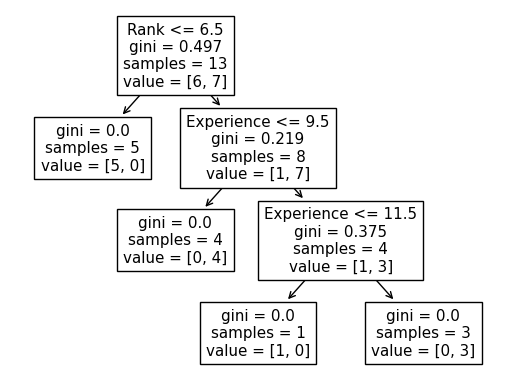

In [7]:
df['Nationality'] = df['Nationality'].map({'UK': 0, 'USA': 1, 'N': 2})
df['Go'] = df['Go'].map({'YES': 1, 'NO': 0})

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

In [13]:
# Prediccions a partir del model
print(dtree.predict([[40, 10, 7, 1]]))
print(dtree.predict([[30, 2, 7, 0]]))

[0]
[1]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
dtree.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Age', 'Experience', 'Rank', 'Nationality'], dtype=object),
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=int64),
 'n_classes_': 2,
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x238ee3d3980>}

In [17]:
# Càlcul de l'exactitud Accuracy
# Podeu veure altres métriques d'avaluació del model a ..
# https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn import metrics as m

print("Exactitud:", m.accuracy_score(y, dtree.predict(X)))
print("F1 score:", m.f1_score(y, dtree.predict(X)))


Exactitud: 1.0
F1 score: 1.0


# Bootstrap Aggregation (Random Forests)
# BAGGING O BOSSA DE PROVES

In [20]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree


data = datasets.load_wine(as_frame = True)
data.data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [21]:
data.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [22]:
# Primera prova, un arbre de decisió normal amb conjunt de entrenament i de test
#
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

# Arbre de Classificació (entrenament)
#
dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

# Evaluació del resultat per grup d'entrenament i pel test
#
y_test_pred = dtree.predict(X_test)

print("Train data accuracy:", m.accuracy_score(y_train, dtree.predict(X_train)))
print("Test data accuracy:", m.accuracy_score(y_test, y_test_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


## ARA entenarem un grup de 12 arbres

In [23]:
# S'agafen les columes de dades i es posen a la X. La columna target és la y
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

# Una bossa de proves de 12 estimadors i per cadascún es recull score

bags = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

bags.fit(X_train, y_train)


BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)

In [24]:
y_test_pred = bags.predict(X_test)
print("Train data accuracy:", m.accuracy_score(y_train,  bags.predict(X_train)))
print("Test data accuracy:", m.accuracy_score(y_test,  y_test_pred))


Train data accuracy: 1.0
Test data accuracy: 0.9555555555555556


In [25]:
bags.__dict__

{'estimator': None,
 'n_estimators': 12,
 'estimator_params': (),
 'base_estimator': 'deprecated',
 'max_samples': 1.0,
 'max_features': 1.0,
 'bootstrap': True,
 'bootstrap_features': False,
 'oob_score': True,
 'warm_start': False,
 'n_jobs': None,
 'random_state': 22,
 'verbose': 0,
 'feature_names_in_': array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
        'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
        'proanthocyanins', 'color_intensity', 'hue',
        'od280/od315_of_diluted_wines', 'proline'], dtype=object),
 'n_features_in_': 13,
 '_n_samples': 133,
 'classes_': array([0, 1, 2]),
 'n_classes_': 3,
 '_estimator': DecisionTreeClassifier(),
 '_max_samples': 133,
 '_max_features': 13,
 'estimators_': [DecisionTreeClassifier(random_state=1929108492),
  DecisionTreeClassifier(random_state=1564504698),
  DecisionTreeClassifier(random_state=986264995),
  DecisionTreeClassifier(random_state=406464487),
  DecisionTreeClassifier(random_state=166

## VISUALITZANT DIFERENTS ARBRES

<Figure size 3000x2000 with 0 Axes>

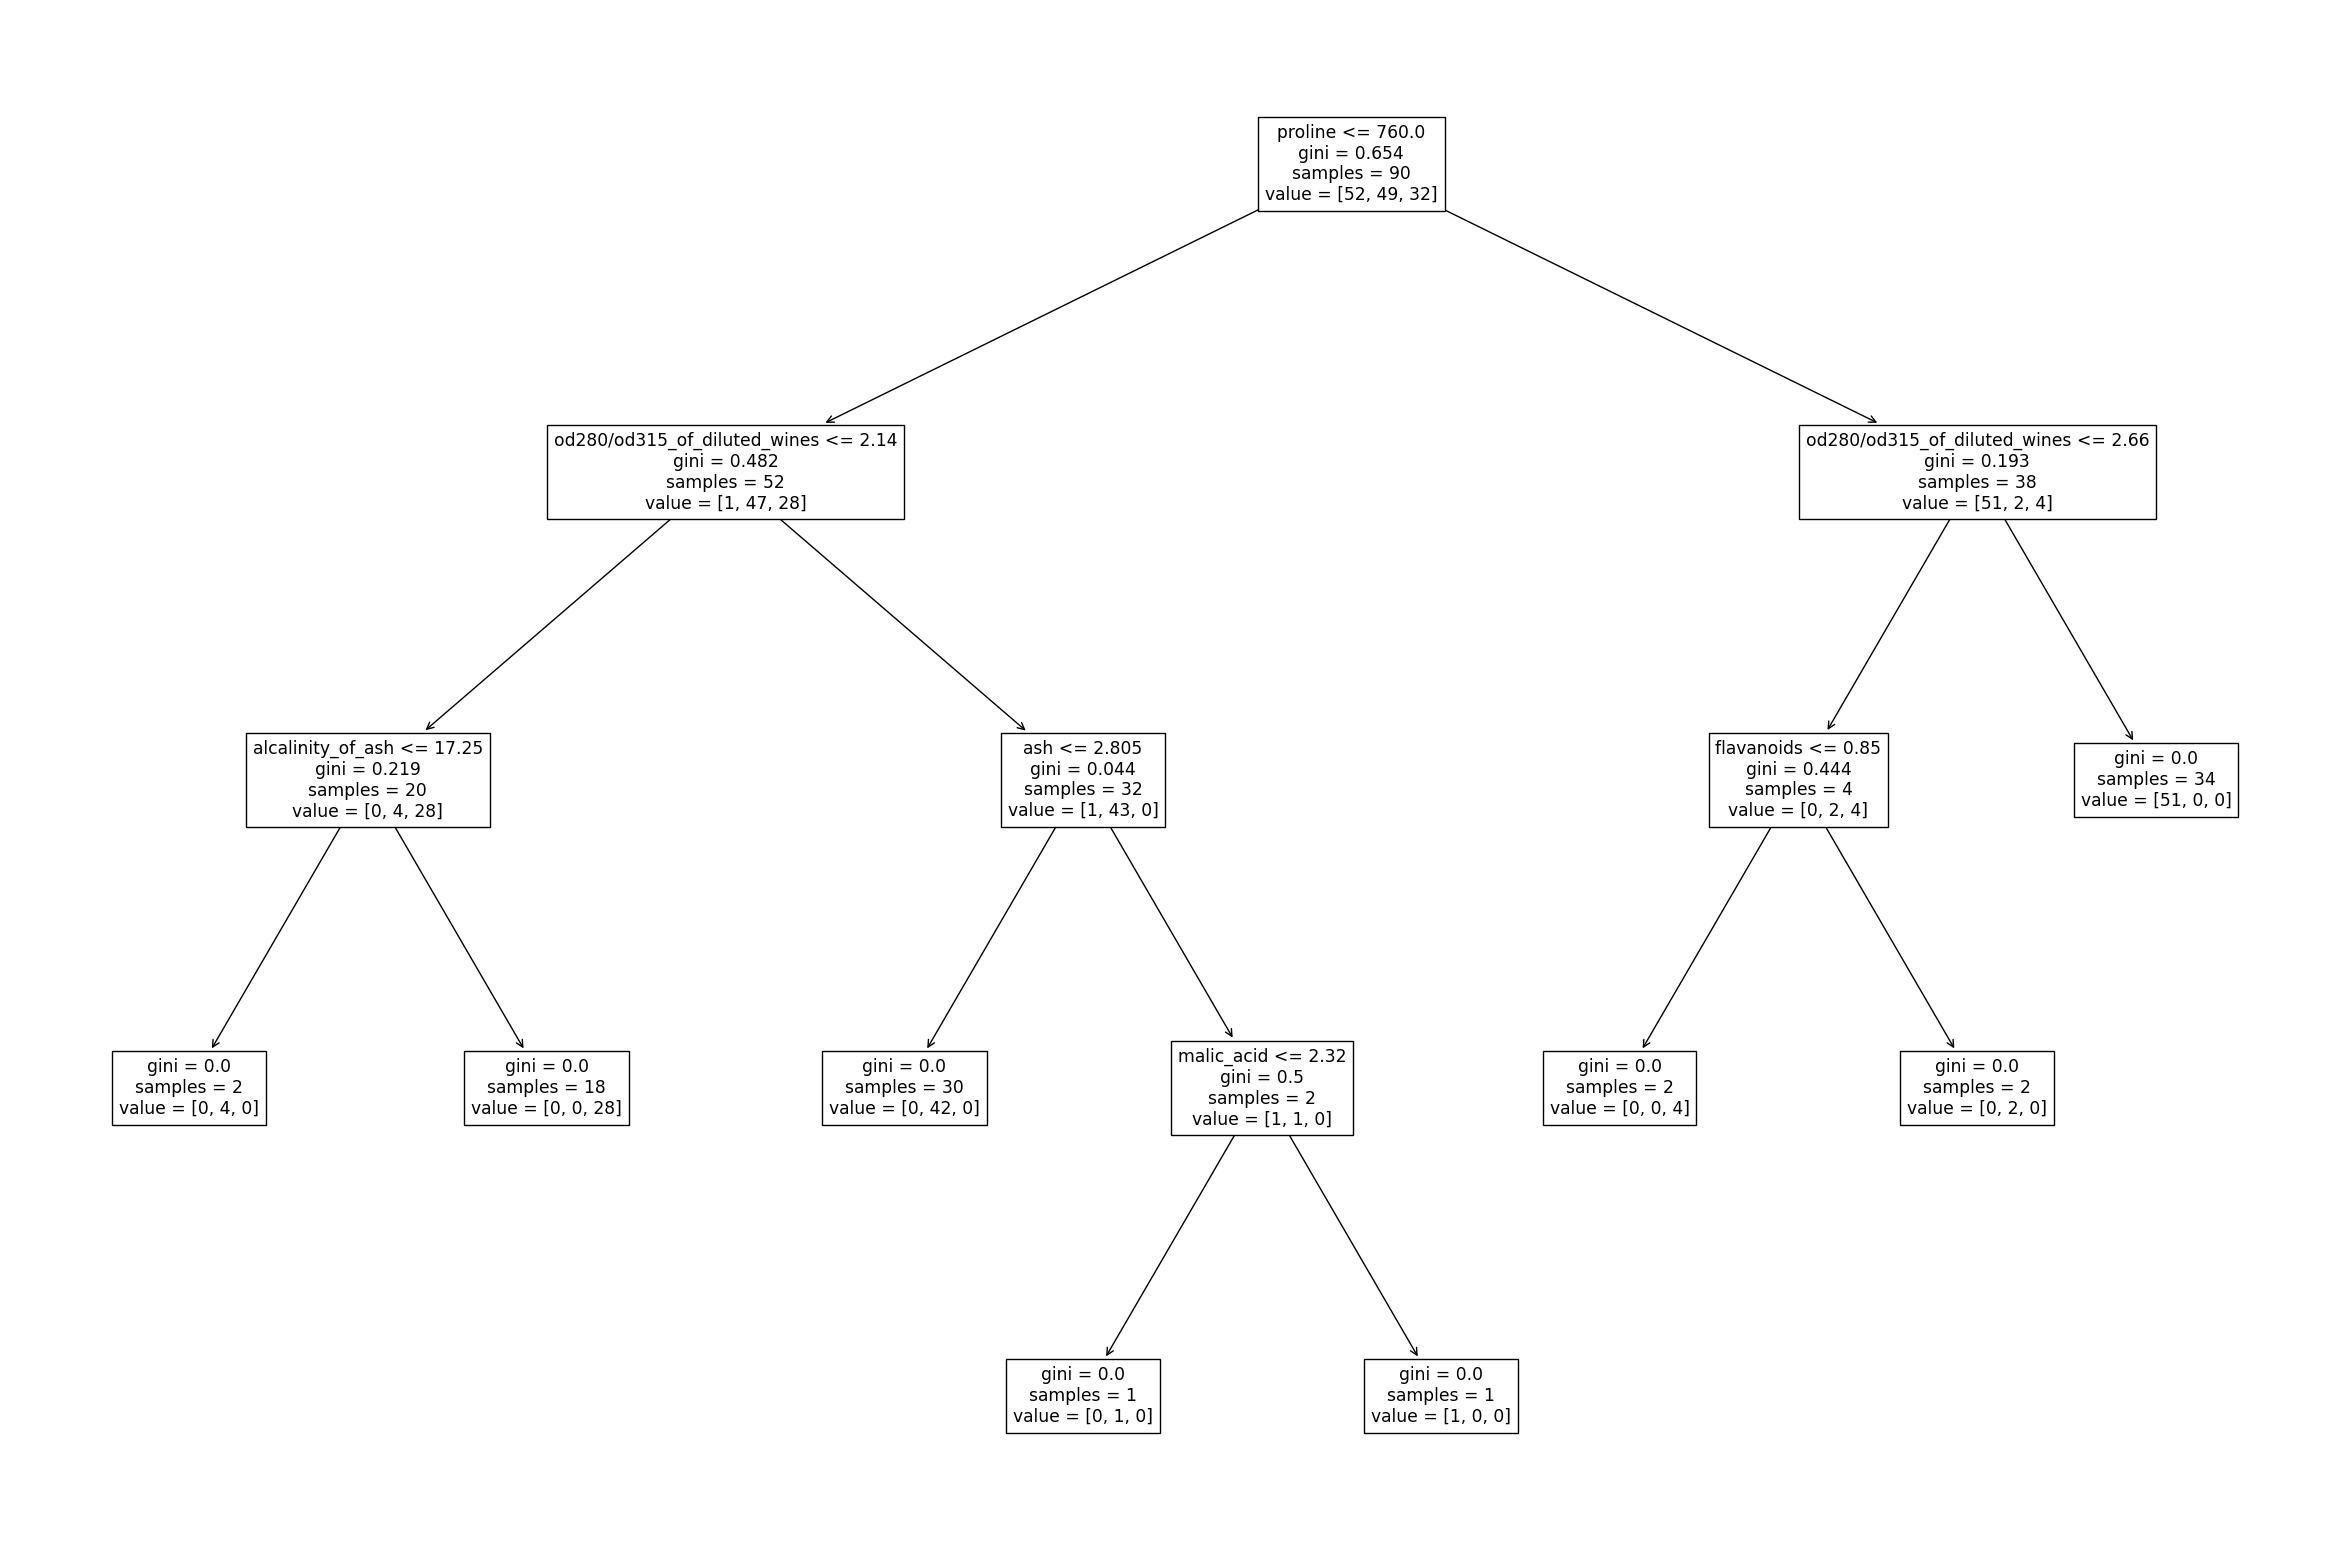

<Figure size 3000x2000 with 0 Axes>

In [26]:
plt.figure(figsize=(30, 20))

#--- Variant el índex dels estimadors podem veure un arbre diferent
plot_tree(bags.estimators_[1], feature_names = X.columns)
plt.figure(figsize=(30, 20))